In [35]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

from math import exp
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import ttest_rel
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import ttest_1samp
from scipy.stats import mode
from scipy.stats import ttest_ind
from scipy.stats import norm
from scipy.stats import t

# December 2023 Statistics Exam

## Exercise I
A population is exponentially distributed with rate λ = 2.

#### Question I.1 (1)
Which of the following statements is true?

1. □ The probability of obtaining an observation between 1 and 2 in a random draw can be calculated in R by:  
   `pexp(1, rate=2) - pexp(2, rate=2)`

2. □ The probability of obtaining an observation below 1 in a random draw can be calculated in R by:  
   `pexp(2, rate=2)`

3. □ The probability of obtaining an observation below 1 in a random draw can be calculated in R by:  
   `1 - pexp(1, rate=2)`

4. □ The probability of obtaining an observation above 3 in a random draw can be calculated in R by:  
   `dexp(3, rate=2)`

5. □ None of the above statements are correct.


The correct awnser here is 5.

#### Question I.2 (2)
According to the central limit theorem (CLT) what type of distribution approximates the mean
of a random sample with n = 100 observations from the population (note that CLT does not
say anything particular about the sample size n = 100)?


Here the correct awnser is 2.

This is why
The Central Limit Theorem (CLT) states that:

The sampling distribution of the mean of a sufficiently large random sample
(regardless of the population's distribution) will be approximately normal
with a mean equal to the population mean ($\mu$) and a standard deviation equal to:

$$
\frac{\sigma}{\sqrt{n}}
$$

where $\sigma$ is the population standard deviation and $n$ is the sample size.

## Exercise II
A one-way ANOVA model has been fitted to some data from a balanced experiment (an equal number of observations for each treatment). The ANOVA table from the analysis is given below, where some numbers are replaced by letters.

| Source      | DF  | SS   | MS   | Test Statistic | p-value |
|-------------|------|------|------|----------------|---------|
| Treatment   | 9    | 207  | D    | E              | 0.03    |
| Residual    | 50   | B    | C    |                |         |
| Total       | A    | 707  |      |                |         |

#### Question II.1 (3)
Which set of values is consistent with the ANOVA table?


In [2]:
# Given values
treatment_df = 9
treatment_ss = 207
residual_df = 50
total_ss = 707
p_value = 0.03

# Calculate total DF
total_df = treatment_df + residual_df

# Calculate residual SS
residual_ss = total_ss - treatment_ss

# Calculate MS for treatment and residual
ms_treatment = treatment_ss / treatment_df
ms_residual = residual_ss / residual_df

# Calculate test statistic
test_statistic = ms_treatment / ms_residual

# Verify the values
print(f"Total DF (A) = {total_df}")
print(f"Residual SS (B) = {residual_ss}")
print(f"Residual MS (C) = {ms_residual}")
print(f"Treatment MS (D) = {ms_treatment}")
print(f"Test Statistic (E) = {test_statistic}")

Total DF (A) = 59
Residual SS (B) = 500
Residual MS (C) = 10.0
Treatment MS (D) = 23.0
Test Statistic (E) = 2.3


Here the awnser is 2.

#### Question II.2 (4)
Two specific treatments are then compared in the post hoc analysis. What is the least significant
difference between the two treatment means using a 5% significance level?

In [5]:
# Number of observations per treatment (assuming balanced design)
n = 10  # Example value, replace with actual number if different

# Significance level
alpha = 0.05

# Calculate the critical t-value
t_critical = stats.t.ppf(1 - alpha/2, residual_df)

# Calculate the least significant difference (LSD)
lsd = t_critical * (2 * ms_residual / n) ** 0.5

print(f"Least Significant Difference (LSD) = {lsd:.4f}")

Least Significant Difference (LSD) = 2.8405


Here the awnser is 1.

## Exercise III
Temperature in the indoor environment is an important part of people’s well being, and in
addition heating is an important part of the energy consumption in houses.
A house owner is considering the indoor temperature in one of the rooms of his house. As a
first approach, he decides to analyse the daily average temperature in the room over a period
of time. The R-output from his analysis is given below (the vector temp contains the daily
average temperatures in the room).

**Data:** `temp`

- **t** = 160.53  
- **df** = 233  
- **p-value** < 2.2e-16  

**Alternative Hypothesis:** True mean is not equal to 0

**95% Confidence Interval:**
- Lower Bound: 19.97593  
- Upper Bound: 20.47234  

**Sample Estimates:**
- Mean of x: 20.22413

#### Question III.1 (5)
How many days did the house owner use for the analysis?


In [12]:
# Given degrees of freedom
df = 233

# Calculate the number of days (sample size)
number_of_days = df + 1

print(f"Number of days used for the analysis = {number_of_days}")

Number of days used for the analysis = 234


The awnser here is 3.

#### Question III.2 (6)
The house owner wants to test the hypotesis that the mean temperature in the room is 20 ◦C
against the alternative that the mean temperature is different from 20 ◦C. What is the usual
p-value for this hypothesis test?

In [14]:
# Given values
sample_mean = 20.22413
population_mean = 20
confidence_interval = [19.97593, 20.47234]
sample_size = number_of_days

# Calculate t-critical value for 95% confidence level
t_critical = t.ppf(0.975, df)

# Calculate sample standard deviation from confidence interval
margin_of_error = (confidence_interval[1] - confidence_interval[0]) / 2
sample_std = margin_of_error * (sample_size**0.5) / t_critical

# Calculate the t-statistic
t_statistic = (sample_mean - population_mean) / (sample_std / sample_size**0.5)

# Calculate the two-tailed p-value
p_value = 2 * (1 - t.cdf(abs(t_statistic), df))

# Print results
print(f"t-statistic = {t_statistic:.4f}")
print(f"p-value = {p_value:.4f}")

t-statistic = 1.7791
p-value = 0.0765


Here the awnser is 5.

The house owner would also like to analyse the variation over time. In order to do so, he decides
to test whether or not the mean temperature at a specific time of day is constant over time.
Formally, he does this by testing the hypothesis that the temperature at that time of day can
be assumed to be the same in two different months. The output of the analysis is given below
(the test statistics have been replaced by Q):


Welch Two Sample t-test

 Data: `temp1` and `temp2`

- **t-statistic**: \( Q \)  
- **Degrees of Freedom**: \( df = 53.627 \)  
- **p-value**: 0.9793  

 Alternative Hypothesis:
The true difference in means is not equal to 0.

 95% Confidence Interval:
\[
[-0.9278637, 0.9040722]
\]

 Sample Estimates:
- **Mean of `x`**: 19.10497  
- **Mean of `y`**: 19.11686

#### Question III.3 (7)
Is there a significant difference in the average temperature between the two months on a
significance level α = 0.05?


In [16]:
# Given p-value from the Welch Two Sample t-test
p_value_welch = 0.9793

# Significance level
alpha = 0.05

# Determine if there is a significant difference
if p_value_welch < alpha:
    print("There is a significant difference in the average temperature between the two months.")
else:
    print("There is no significant difference in the average temperature between the two months.")

There is no significant difference in the average temperature between the two months.


So here the correct awnser is 4.

#### Question III.4 (8)
Suppose we instead had used the (unprovided) test statistic Q for testing if there is a significant
temperature difference between the two months. What are the critical values using a significance
level α = 0.01?


In [17]:
# Given degrees of freedom for the Welch Two Sample t-test
df_welch = 53.627

# Significance level for the two-tailed test
alpha_01 = 0.01

# Calculate the critical t-values for a two-tailed test
t_critical_low = t.ppf(alpha_01 / 2, df_welch)
t_critical_high = t.ppf(1 - alpha_01 / 2, df_welch)

print(f"Critical values at α = 0.01: [{t_critical_low:.4f}, {t_critical_high:.4f}]")

Critical values at α = 0.01: [-2.6707, 2.6707]


Here the correct awsner is 5.

#### Question III.5 (9)

The house owner now wants to test if there is a difference between two specific days, while taking the hour of day into account.  
He therefore considers a **paired t-test** for the comparison.

If $X_i$ and $Y_i$ denote the outcomes from the two samples used in the paired t-test, which of the following statements about the assumptions of the statistical model is correct?

We use the notation:
- $V[X_i] = \sigma^2_X$,  
- $V[Y_i] = \sigma^2_Y$,  
- $V[X_i - Y_i] = \sigma^2_{X-Y}$  

for the variances, and:
- $\mu_X$, $\mu_Y$ for the means of the two samples,  
- $\mu$ for the difference in means.


The correct answer is 3.

The assumptions of the paired t-test are:

1. The differences $ D_i = X_i - Y_i $ are independent and identically distributed (i.i.d.).
2. The differences $ D_i  are normally distributed.
3. The mean of the differences $ D_i $ is $mu$
4. The variance of the differences $ D_i $ is $\sigma^2_{X-Y}$.

Therefore, the correct statement is:

3. □ The differences $ D_i = X_i - Y_i $ are normally distributed with mean $\mu$ and variance $\sigma^2_{X-Y}$.

## Exercise IV
An energy trading company wants to learn about the electricity price in a particular area for
a particular period. They download data from the market and calculate the daily electricity
price and relevant weather variables. The following variables are in the data set:
* Price: the electricity price in the market
* Cloudcover: cloud cover (in %)
* Humid: relative humidity
* Temperature: temperature
* Windspeed: wind speed


In [ ]:
##
## Call:
## lm(formula = Price ~ Cloudcover + Humid + Temperature + Windspeed)
##
## Residuals:
## Min 1Q Median 3Q Max
## -0.30525 -0.04983 0.02637 0.07770 0.18326
##
## Coefficients:
## Estimate Std. Error t value Pr(>|t|)
## (Intercept) 0.4419418 0.1080436 4.090 0.000139 ***
## Cloudcover 0.0003513 0.0006310 0.557 0.579901
## Humid 0.0003016 0.0010300 0.293 0.770754
## Temperature 0.0098091 0.0041229 2.379 0.020784 *
## Windspeed -0.0529552 0.0127183 -4.164 0.000109 ***
## ---
## Signif. codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
##
## Residual standard error: 0.1112 on 56 degrees of freedom
## Multiple R-squared: 0.3757,Adjusted R-squared: 0.3311
## F-statistic: 8.427 on 4 and 56 DF, p-value: 2.146e-05

#### Question IV.1 (10)
How many days are included in the data set?

In [30]:
# Given degrees of freedom for residuals
residual_df = 56

# Number of parameters (including intercept)
n_parameters = 5  # Intercept + 4 predictors

# Calculate the number of days (observations)
n_observations = residual_df + n_parameters

print(f"Number of days included in the data set = {n_observations}")


Number of days included in the data set = 61


So the awnser here is 5.

#### Question IV.2 (11)
What is the result of the first backward selection step on the model when using a significance
level α = 0.05 (both the conclusion and the argument must be correct)?

Here the awnser is 1. Humid should be removed, since 0.771 > 0.580 > 0.05

#### Question IV.3 (12)
Disregarding any conclusion about a potential model reduction, which of the following conclusions can be drawn for the market at the particular period with the estimated result?

In [7]:
# Define regression results based on the provided R summary
regression_results = {
    "Variable": ["Intercept", "Cloudcover", "Humid", "Temperature", "Windspeed"],
    "Estimate": [0.4419418, 0.0003513, 0.0003016, 0.0098091, -0.0529552],
    "Std. Error": [0.1080436, 0.0006310, 0.0010300, 0.0041229, 0.0127183],
    "t value": [4.090, 0.557, 0.293, 2.379, -4.164],
    "Pr(>|t|)": [0.000139, 0.579901, 0.770754, 0.020784, 0.000109],
}

# Convert to a DataFrame
df_results = pd.DataFrame(regression_results)

# Display the summary data
print("Regression Summary:")
print(df_results)

# Model statistics
r_squared = 0.3757
adjusted_r_squared = 0.3311
f_statistic = 8.427
f_statistic_p_value = 2.146e-05
residual_standard_error = 0.1112
degrees_of_freedom = 56

# Print model statistics
print("\nModel Statistics:")
print(f"Residual Standard Error: {residual_standard_error} on {degrees_of_freedom} degrees of freedom")
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")
print(f"F-statistic: {f_statistic}, p-value: {f_statistic_p_value}")

# Interpretations
print("\nConclusions:")
for _, row in df_results.iterrows():
    variable = row["Variable"]
    p_value = row["Pr(>|t|)"]
    if variable == "Intercept":
        continue
    if p_value < 0.05:
        significance = "statistically significant"
    else:
        significance = "not statistically significant"
    print(f"{variable} is {significance} with p-value = {p_value:.6f}.")

# convert r-squared to percentage
r_squared_percentage = r_squared * 100
print(f"R-squared: {r_squared_percentage:.4f}%")

Regression Summary:
      Variable  Estimate  Std. Error  t value  Pr(>|t|)
0    Intercept  0.441942    0.108044    4.090  0.000139
1   Cloudcover  0.000351    0.000631    0.557  0.579901
2        Humid  0.000302    0.001030    0.293  0.770754
3  Temperature  0.009809    0.004123    2.379  0.020784
4    Windspeed -0.052955    0.012718   -4.164  0.000109

Model Statistics:
Residual Standard Error: 0.1112 on 56 degrees of freedom
R-squared: 0.3757
Adjusted R-squared: 0.3311
F-statistic: 8.427, p-value: 2.146e-05

Conclusions:
Cloudcover is not statistically significant with p-value = 0.579901.
Humid is not statistically significant with p-value = 0.770754.
Temperature is statistically significant with p-value = 0.020784.
Windspeed is statistically significant with p-value = 0.000109.
R-squared: 37.5700%


Here the awnser is 5. The model can explain 37.6% of the observed variation in the price in the period

## Exercise V
This exercise contains questions related to supermarkets.
#### Question V.1 (13)
Back in the days, the cashiers in the supermarket entered the prices manually on the cash
register. When employees were tired, they would often make errors when entering the prices.
Assume that for a particular situation, they randomly made a price error for 5% of the costumers. Assume independence of the price enterings.
What is the probability that 10 or more out of 100 customers would experience a price error?


In [8]:
# Given probability of error
p_error = 0.05

# Number of customers
n_customers = 100

# Calculate the probability of 10 or more errors
prob_10_or_more_errors = 1 - binom.cdf(9, n_customers, p_error)

print(f"Probability that 10 or more out of 100 customers would experience a price error: {prob_10_or_more_errors:.4f}")

Probability that 10 or more out of 100 customers would experience a price error: 0.0282


Here the awnser is 3.

#### Question V.2 (14)
In a study of a supermarket, the arrival rate of customers is assumed to be 200 customers/hour
in the peak hours. Customers arrive according to a Poisson process. If more than 250 customers
arrive in an hour, the store’s capacity will be exceeded. What is the probability that the store’s
capacity is not exceeded during a peak hour?


In [9]:
# Given arrival rate (λ) and capacity limit
arrival_rate = 200
capacity_limit = 250

# Calculate the probability that the store's capacity is not exceeded
prob_not_exceeded = poisson.cdf(capacity_limit, arrival_rate)

print(f"Probability that the store's capacity is not exceeded during a peak hour: {prob_not_exceeded:.4f}")

Probability that the store's capacity is not exceeded during a peak hour: 0.9997


Here the awnser is 5.

#### Question V.3 (15)
Let X ∼ N(µ, σ2) denote the average daily turnover in a particular supermarket store. The
store was open 5 days a week, and it can be assumed that the daily turnovers are independent
between days.

One of the following plots show the probability density of the weekly turnover. Which one?


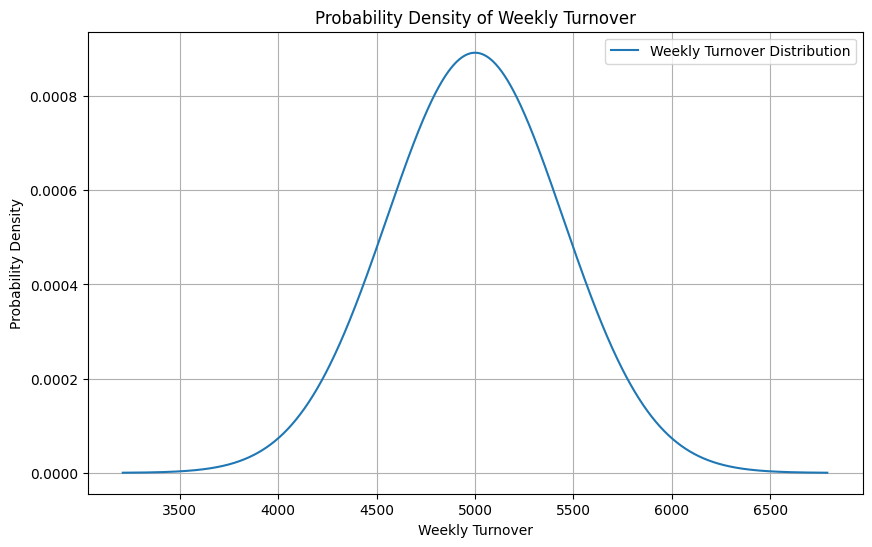

In [11]:
# Given parameters for daily turnover
mu_daily = 1000  # Example mean value
sigma_daily = 200  # Example standard deviation

# Parameters for weekly turnover
mu_weekly = 5 * mu_daily
sigma_weekly = np.sqrt(5) * sigma_daily

# Generate x values for the plot
x = np.linspace(mu_weekly - 4 * sigma_weekly, mu_weekly + 4 * sigma_weekly, 1000)

# Calculate the probability density function
pdf = norm.pdf(x, mu_weekly, sigma_weekly)

# Plot the probability density function
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Weekly Turnover Distribution')
plt.xlabel('Weekly Turnover')
plt.ylabel('Probability Density')
plt.title('Probability Density of Weekly Turnover')
plt.legend()
plt.grid(True)
plt.show()

Here the awnser is 1.

## Exercise VI
Let X and Y be two independent exponentially distributed random variables with rates 1.2
and 1.7, respectively.
#### Question VI.1 (16)
We are interested in the probability that X + Y is greater than 3. Use simulation to assess
which of the values below is the correct result. We recommend that you use at least 10000
simulations.

In [12]:
# Set the rates for the exponential distributions
rate_X = 1.2
rate_Y = 1.7

# Number of simulations
n_simulations = 10000

# Generate random samples from exponential distributions
samples_X = np.random.exponential(1/rate_X, n_simulations)
samples_Y = np.random.exponential(1/rate_Y, n_simulations)

# Calculate the sum of X and Y
samples_sum = samples_X + samples_Y

# Calculate the probability that X + Y is greater than 3
prob_X_plus_Y_greater_than_3 = np.mean(samples_sum > 3)

print(f"Probability that X + Y is greater than 3: {prob_X_plus_Y_greater_than_3:.4f}")

Probability that X + Y is greater than 3: 0.0818


Here the awnser that is closet is 1, this is also the correct awnser.

## Exercise VII
The simple linear regression model is given by
$$
Yi = β0 + β1xi + εi,
$$
where $εi ∼ N(0, σ^2)$ and are independent, i = 1, . . . , n.

The simple linear regression model is fitted, and the result is printed below. Note that some
of the values have been replaced by letters:


In [13]:
# Regression summary data
summary_data = {
    "Variable": ["Intercept", "x"],
    "Estimate": [-0.43369, None],  # Replace None with the actual value for A if available
    "Std. Error": [0.49844, 0.09284],
    "t value": [-0.87, 19.95],
    "Pr(>|t|)": [0.392, "<2e-16"]
}

# Model statistics
residual_standard_error = 2.636
degrees_of_freedom = 28
r_squared = 0.9342
adjusted_r_squared = 0.9319
f_statistic = 397.8
f_statistic_p_value = "<2.2e-16"

# Convert summary data to DataFrame for display
df_summary = pd.DataFrame(summary_data)

# Print regression coefficients
print("Regression Coefficients:")
print(df_summary)

# Print model statistics
print("\nModel Statistics:")
print(f"Residual Standard Error: {residual_standard_error} on {degrees_of_freedom} degrees of freedom")
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")
print(f"F-statistic: {f_statistic}, p-value: {f_statistic_p_value}")

# Interpretations
print("\nConclusions:")
if df_summary.loc[df_summary['Variable'] == 'x', 'Pr(>|t|)'].values[0] == "<2e-16":
    print("The predictor 'x' is statistically significant and has a strong effect on the response variable 'y'.")
else:
    print("The predictor 'x' is not statistically significant.")

if df_summary.loc[df_summary['Variable'] == 'Intercept', 'Pr(>|t|)'].values[0] >= 0.05:
    print("The intercept is not statistically significant, meaning it may not be meaningful in this model.")
else:
    print("The intercept is statistically significant.")

if r_squared > 0.9:
    print(f"The model explains {r_squared * 100:.2f}% of the variability in 'y', indicating an excellent fit.")

Regression Coefficients:
    Variable  Estimate  Std. Error  t value Pr(>|t|)
0  Intercept  -0.43369     0.49844    -0.87    0.392
1          x       NaN     0.09284    19.95   <2e-16

Model Statistics:
Residual Standard Error: 2.636 on 28 degrees of freedom
R-squared: 0.9342
Adjusted R-squared: 0.9319
F-statistic: 397.8, p-value: <2.2e-16

Conclusions:
The predictor 'x' is statistically significant and has a strong effect on the response variable 'y'.
The intercept is not statistically significant, meaning it may not be meaningful in this model.
The model explains 93.42% of the variability in 'y', indicating an excellent fit.


#### Question VII.1 (17)
Which of the following values should replace A in the result (hint: looking at the figure can also
be of help)?
* -0.73
*  0.73
*  1.85
*  9.46
*  20.15


In [14]:
# Given values
t_value = 19.95  # t-value for the slope
std_error = 0.09284  # Standard Error of the slope

# Calculate the estimate for the slope
estimate = t_value * std_error

# Print the result
print(f"The estimated value for A is: {estimate:.2f}")

The estimated value for A is: 1.85


So the awnser here is 3.

#### Question VII.2 (18)
Which of the following calls in R calculates the width of the 99% confidence interval for β0?

In [15]:
# Given values
alpha = 0.01  # 99% confidence level implies alpha = 0.01
df = 28  # Degrees of freedom
std_error_beta0 = 0.49844  # Standard error of the intercept

# Calculate the critical value
critical_value = t.ppf(1 - alpha / 2, df)

# Calculate the width of the confidence interval
width = 2 * critical_value * std_error_beta0

# Print the result
print(f"The width of the 99% confidence interval for β0 is: {width:.4f}")

The width of the 99% confidence interval for β0 is: 2.7546


## Exercise VIII
The Danish Health Authority (DHA) is designing a survey to examine the drinking habits of
young adults in Denmark. Specifically, the DHA wants to estimate the proportion of young
adults in Denmark that drink more than the maximum recommended units of alcohol in an
average week. The DHA wants the estimate to be within 0.01 of the true proportion with 95%
probability.
#### Question VIII.1 (19)
What is the minimum number of young adults that should be included in the survey to achieve
the desired precision (we refrain from making any assumptions about true proportion)?


In [16]:
# Given values
Z = 1.96  # Z-value for 95% confidence level
E = 0.01  # Margin of error
p = 0.5   # Estimated proportion for maximum variability

# Calculate the minimum sample size
n = (Z**2 * p * (1 - p)) / E**2
n = int(n) + 1  # Round up to the next whole number

print(f"Minimum number of young adults to be included in the survey: {n}")

Minimum number of young adults to be included in the survey: 9604


Here the awnser is 3.

#### Question VIII.2 (20)
In a previous study including 400 young adults, statisticians from the DHA accepted the null
hypothesis H0 : p = 0.25 at a 10% significance level. What is the least possible estimate of the
proportion that the statisticians could have found in the study?


In [18]:
# Given values
n = 400  # Sample size
p_null = 0.25  # Null hypothesis proportion
alpha = 0.10  # Significance level

# Calculate the critical value for the lower bound
z_critical = norm.ppf(alpha / 2)

# Calculate the standard error
standard_error = (p_null * (1 - p_null) / n) ** 0.5

# Calculate the lower bound of the confidence interval
lower_bound = p_null + z_critical * standard_error

print(f"The least possible estimate of the proportion is: {lower_bound:.4f}")

#convert to percentage
lower_bound_percentage = lower_bound * 100
print(f"The least possible estimate of the proportion is: {lower_bound_percentage:.4f}%")

The least possible estimate of the proportion is: 0.2144
The least possible estimate of the proportion is: 21.4388%


Again here we need to do some rounding up, the correct awser is 3.

## Exercise IX

#### Skipped due to being r code

## Exercise X

A hospital took blood samples from 469 randomly selected people of different age and screened the samples for a specific chemical. The results of the screenings are given in Table 1 below:

|                    | Age group 1 | Age group 2 | Age group 3 | Age group 4 | Total |
|--------------------|-------------|-------------|-------------|-------------|-------|
| Chemical not detected | 17          | 28          | 21          | 15          | 81    |
| Chemical detected     | 73          | 138         | 105         | 72          | 388   |
| Total                 | 90          | 166         | 126         | 87          | 469   |

The data can be read into python:


In [28]:
# Create the matrix
table1 = np.array([[17, 28, 21, 15], 
                   [73, 138, 105, 72]])

# Print the matrix
print("Table 1:")
print(table1)

Table 1:
[[ 17  28  21  15]
 [ 73 138 105  72]]


#### Question X.1 (24)
Under the null hypothesis that the probability of a sample having traces of the chemical is the
same across the different age groups, what is the expected number of samples without traces
of the chemical taken from people in age group 3?

In [29]:
# Total number of samples
grand_total = table1.sum()

# Total number of samples in age group 3
age_group_3_total = table1[:, 2].sum()

# Total number of samples without traces of the chemical
no_chemical_total = table1[0, :].sum()

# Calculate the expected number of samples without traces of the chemical in age group 3
expected_no_chemical_age_group_3 = (no_chemical_total * age_group_3_total) / grand_total

print(f"Expected number of samples without traces of the chemical in age group 3: {expected_no_chemical_age_group_3:.4f}")

Expected number of samples without traces of the chemical in age group 3: 21.7612


Here the correct awnser is 2

#### Question X.2 (25)
Which of the following is the correct conclusion when testing the null hypothesis that the
probability of a sample having traces of the chemical is the same across the different age
groups at a 5% significance level (both the argument and the conclusion must be correct)?
* The p-value is 0.025 and the null hypothesis is therefore rejected
* The p-value is 0.025 and the null hypothesis is therefore accepted
* The p-value is 0.975 and the null hypothesis is therefore rejected
* The p-value is 0.975 and the null hypothesis is therefore accepted
* The p-value is 0.975 and the test is therefore inconclusive

In [30]:
# Perform chi-square test for independence
chi2_stat, p_value, dof, expected = chi2_contingency(table1)

# Significance level
alpha = 0.05

# Print the p-value
print(f"p-value = {p_value:.4f}")

# Conclusion
if p_value < alpha:
    print("The p-value is {:.4f} and the null hypothesis is therefore rejected".format(p_value))
else:
    print("The p-value is {:.4f} and the null hypothesis is therefore accepted".format(p_value))

p-value = 0.9750
The p-value is 0.9750 and the null hypothesis is therefore accepted


So here the awnser is 4.

#### Question X.3 (26)
The samples that had traces of the chemical were further subdivided as shown in Table 2 below:

|                    | Age group 1 | Age group 2 | Age group 3 | Age group 4 | Total |
|--------------------|-------------|-------------|-------------|-------------|-------|
| Type A detected    | 35          | 64          | 42          | 20          | 161   |
| Type B detected    | 30          | 60          | 55          | 45          | 190   |
| Type C detected    | 8           | 14          | 8           | 7           | 37    |
| Total              | 73          | 138         | 105         | 72          | 388   |


In [31]:
# Create the matrix
table2 = np.array([[35, 64, 42, 20], 
                   [30, 60, 55, 45], 
                   [8, 14, 8, 7]])

# Print the matrix
print("Table 2:")
print(table2)

Table 2:
[[35 64 42 20]
 [30 60 55 45]
 [ 8 14  8  7]]


Consider now only the samples with traces of the chemical. The hospital staff would like to
test for independence between the type of chemical detected in a sample and the age group of
the person who submitted the sample. Assuming the hospital invokes a 90% confidence level,
which of the following statements is correct?


In [38]:


# Perform chi-square test for independence
chi2_stat, p_value, dof, expected = chi2_contingency(table2)

# Significance level
alpha = 0.10

# Print the results
print(f"Chi-square statistic: {chi2_stat:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p_value:.4f}")

# Determine the critical value for the chi-square distribution with the given degrees of freedom
chi2_critical = chi2.ppf(1 - alpha, dof)

# Print the critical value
print(f"Critical value at 90% confidence level: {chi2_critical:.3f}")

# Check if any expected values are less than 5
expected_less_than_5 = (expected < 5).any()

# Conclusion
if chi2_stat > chi2_critical:
    conclusion = "The test rejects the null hypothesis of independence at the chosen significance level."
else:
    conclusion = "The test does not reject the null hypothesis of independence at the chosen significance level."

if expected_less_than_5:
    conclusion = "The test is invalid as some of the calculated expected values are less than 5."

print(conclusion)

Chi-square statistic: 10.177
Degrees of freedom: 6
p-value: 0.1174
Test statistic: 1.206
Critical value at 90% confidence level: 10.645
The test does not reject the null hypothesis of independence at the chosen significance level.


Here we can see that the Chi-square statistic so the correct awnser is 1.

## Exercise XI
#### Question XI.1 (27)
Bertil and Karin have collected data as part of their bachelor thesis, and as part of this, they
are studying the relationship between two variables, height and time.
They wish to apply a linear regression, but cannot agree on how to correctly check the model
assumptions. Only one of the statements below is correct. Which one?

* Non-parametric bootstrapping of the residuals would reveal if the assumptions of linear
regression are met
* A histogram of the height values would reveal if the normality assumption is met
* The value of the coefficient of determination (R2) would reveal if the linearity assumption
is met
* A boxplot of the time values would reveal if the normality assumption is met
* A QQ plot of the residuals would reveal if the normality assumption is met


The awnser here is 5. A QQ plot of the residuals would reveal if the normality assumption is met

## Exercise XII
The following times were recorded by the quarter-mile runners and mile runners of a university
track team (times are in minutes). The observations are read into python by:

In [39]:
# Define the quarter mile times
quarter_mile_times = [0.92, 0.98, 1.04, 0.90, 0.99]

# Define the mile times
mile_times = [4.52, 4.35, 4.60, 4.70, 4.50]

# Print the data
print("Quarter Mile Times:", quarter_mile_times)
print("Mile Times:", mile_times)

Quarter Mile Times: [0.92, 0.98, 1.04, 0.9, 0.99]
Mile Times: [4.52, 4.35, 4.6, 4.7, 4.5]


After viewing this sample of running times, one of the coaches commented that the quartermile
runners turned in more consistent times.
#### Question XII.1 (28)
Calculate the standard deviation (s) and coefficient of variation (CV) to summarize the variability in the data.


In [40]:
# Calculate the standard deviation for quarter mile times
std_quarter_mile = np.std(quarter_mile_times, ddof=1)

# Calculate the coefficient of variation for quarter mile times
cv_quarter_mile = (std_quarter_mile / np.mean(quarter_mile_times)) * 100

# Calculate the standard deviation for mile times
std_mile = np.std(mile_times, ddof=1)

# Calculate the coefficient of variation for mile times
cv_mile = (std_mile / np.mean(mile_times)) * 100

# Print the results
print(f"Standard Deviation (Quarter Mile): {std_quarter_mile:.4f}")
print(f"Coefficient of Variation (Quarter Mile): {cv_quarter_mile:.2f}%")
print(f"Standard Deviation (Mile): {std_mile:.4f}")
print(f"Coefficient of Variation (Mile): {cv_mile:.2f}%")

Standard Deviation (Quarter Mile): 0.0564
Coefficient of Variation (Quarter Mile): 5.84%
Standard Deviation (Mile): 0.1295
Coefficient of Variation (Mile): 2.86%


Here the awnser is: 1. Quarter-mile runners: s = 0.0564, CV = 0.0584.
Mile runners: s = 0.1295, CV = 0.0286.

## Exercise XIII
A sample of 12 of the top-rated hotels in the United States has the following number of rooms
and cost per night for a double room (as read in python).

In [41]:
# Define the rooms data
rooms = [220, 727, 285, 273, 145, 213, 398, 343, 250, 414, 400, 700]

# Define the cost data
cost = [499, 340, 585, 495, 495, 279, 279, 455, 595, 367, 675, 420]

# Print the data
print("Rooms:", rooms)
print("Cost:", cost)

Rooms: [220, 727, 285, 273, 145, 213, 398, 343, 250, 414, 400, 700]
Cost: [499, 340, 585, 495, 495, 279, 279, 455, 595, 367, 675, 420]


#### Question XIII.1 (29)
What is the sample correlation coefficient r? What does it tell you about the relationship
between the number of rooms and the cost per night for a double room?

In [42]:
# Calculate the sample correlation coefficient
r = np.corrcoef(rooms, cost)[0, 1]

# Print the result
print(f"Sample correlation coefficient (r) = {r:.4f}")

# Interpretation
if r > 0:
    relationship = "positive"
elif r < 0:
    relationship = "negative"
else:
    relationship = "no"

print(f"The correlation coefficient indicates a {relationship} linear relationship between the number of rooms and the cost per night for a double room.")

Sample correlation coefficient (r) = -0.2933
The correlation coefficient indicates a negative linear relationship between the number of rooms and the cost per night for a double room.


Here the correct awnser is 5.

## Exercise XIV
A sample was collected and its summary statistics were calculated.
The sample is:

3, 6, 7, 0, 6, 13, 3, 7, 9, 15

The summary statistics are (rounded to two decimals):

| Statistic         | Value  |
|-------------------|--------|
| $\bar{x}$ (Mean)  | 6.9    |
| $s$ (Std. Dev)    | 4.56   |
| $s^2$ (Variance)  | 20.77  |
| Minimum           | 0      |
| Q1 (25th Percentile) | 3.75 |
| Median            | 6.5    |
| Q3 (75th Percentile) | 8.5 |
| Maximum           | 15     |
| $n$ (Sample Size) | 10     |

#### Question XIV.1 (30)
However, we suspect that there is an error in one of the summary statistics, which one?



In [43]:
# Given sample data
sample = [3, 6, 7, 0, 6, 13, 3, 7, 9, 15]

# Calculate the mean
mean = np.mean(sample)

# Calculate the standard deviation
std_dev = np.std(sample, ddof=1)

# Calculate the variance
variance = np.var(sample, ddof=1)

# Calculate the minimum
minimum = np.min(sample)

# Calculate the 25th percentile (Q1)
q1 = np.percentile(sample, 25)

# Calculate the median
median = np.median(sample)

# Calculate the 75th percentile (Q3)
q3 = np.percentile(sample, 75)

# Calculate the maximum
maximum = np.max(sample)

# Calculate the sample size
n = len(sample)

# Print the calculated summary statistics
print(f"Mean: {mean:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Minimum: {minimum}")
print(f"Q1 (25th Percentile): {q1:.2f}")
print(f"Median: {median}")
print(f"Q3 (75th Percentile): {q3:.2f}")
print(f"Maximum: {maximum}")
print(f"Sample Size: {n}")

Mean: 6.90
Standard Deviation: 4.56
Variance: 20.77
Minimum: 0
Q1 (25th Percentile): 3.75
Median: 6.5
Q3 (75th Percentile): 8.50
Maximum: 15
Sample Size: 10


The awnser here is 5.